<a href="https://colab.research.google.com/github/Mohammedhashir17/Machine-Learning/blob/main/Linear-Regression-using-MPG-Datasets-Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients: [-0.15725404]
Intercept: 39.620598019040735
Coefficient of Determination (R^2 Score): 0.626669829578095
Mean Squared Error: 23.389978166507778
Root Mean Squared Error (RMSE): 4.8363186584950935
Residuals: 146    0.173455
282   -3.482242
69    -2.459951
378    8.286407
331    4.715423
Name: mpg, dtype: float64
Mean Absolute Percentage Error (MAPE): 16.279553002387146 %
Adjusted R^2: 0.623775797249243


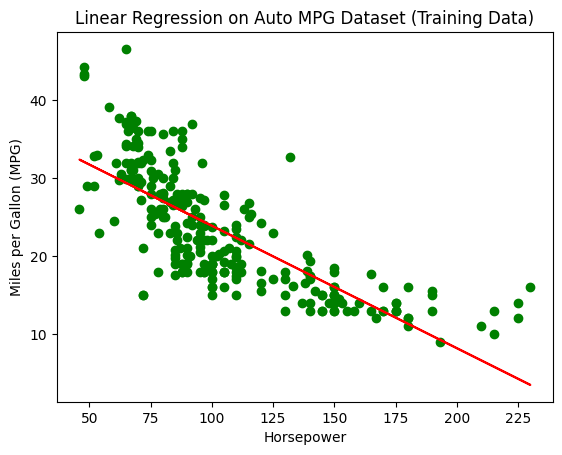

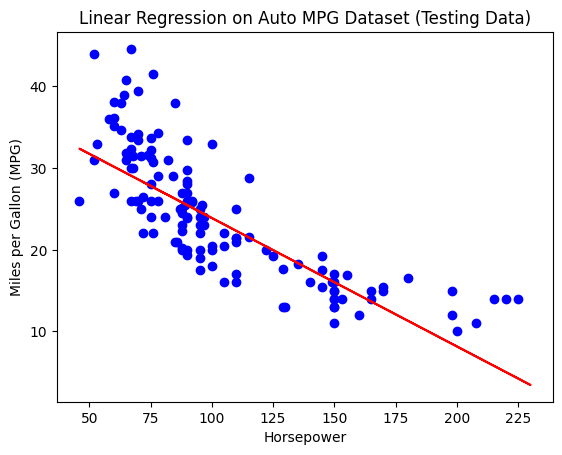

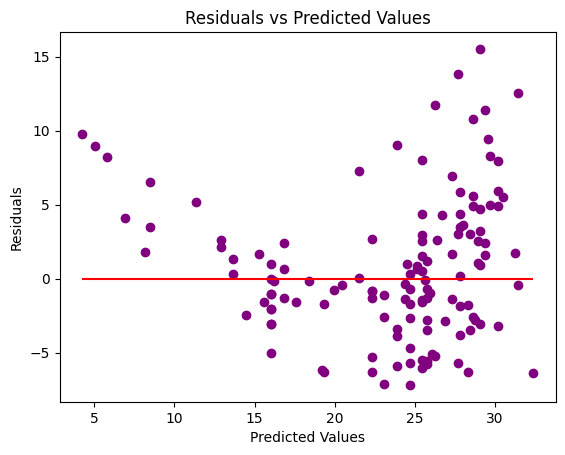

In [3]:
import seaborn as sns
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Load the Auto MPG dataset
auto_mpg = sns.load_dataset('mpg').dropna()  # Load dataset and drop missing values

# Convert 'horsepower' to numeric if it's not already
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg = auto_mpg.dropna(subset=['horsepower'])  # Drop any rows where 'horsepower' is NaN

# Define feature and target variables
x = auto_mpg[['horsepower']]  # Using horsepower as the feature
y = auto_mpg['mpg']  # Target is miles per gallon (MPG)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Create the linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predict the values for both training and testing datasets
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

# Calculate and display the coefficients, intercept, and R^2 score
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Coefficient of Determination (R^2 Score):', r2_score(y_test, y_test_pred))

# Calculate and display the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate and display the residuals for the test data
residuals = y_test - y_test_pred
print('Residuals:', residuals.head())

# Calculate and display the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape, "%")

# Calculate and display the adjusted R-squared
n = len(y_test)
p = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2_score(y_test, y_test_pred)) * (n - 1) / (n - p - 1)
print('Adjusted R^2:', adjusted_r2)

# Plot the training data with the regression line
mtp.scatter(x_train, y_train, color="green")
mtp.plot(x_train, y_train_pred, color="red")
mtp.title("Linear Regression on Auto MPG Dataset (Training Data)")
mtp.xlabel("Horsepower")
mtp.ylabel("Miles per Gallon (MPG)")
mtp.show()

# Plot the testing data with the regression line
mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, y_train_pred, color="red")
mtp.title("Linear Regression on Auto MPG Dataset (Testing Data)")
mtp.xlabel("Horsepower")
mtp.ylabel("Miles per Gallon (MPG)")
mtp.show()

# Plot residuals
mtp.scatter(y_test_pred, residuals, color="purple")
mtp.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), color="red")
mtp.title("Residuals vs Predicted Values")
mtp.xlabel("Predicted Values")
mtp.ylabel("Residuals")
mtp.show()
